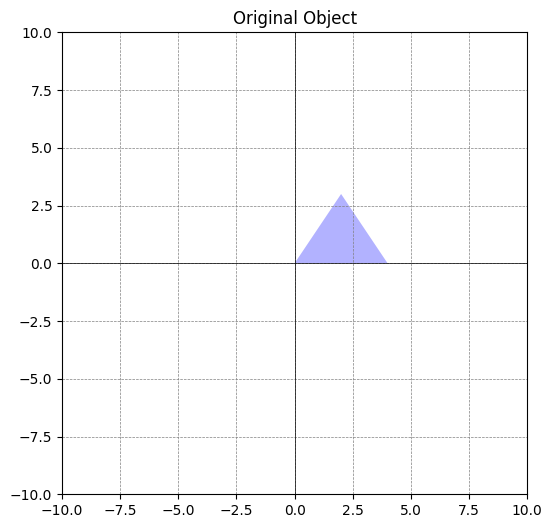

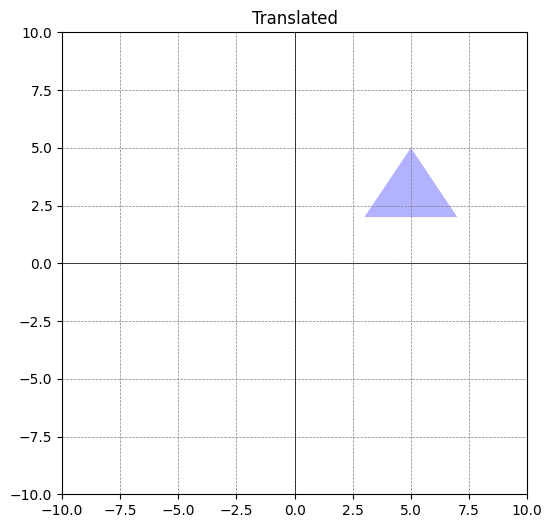

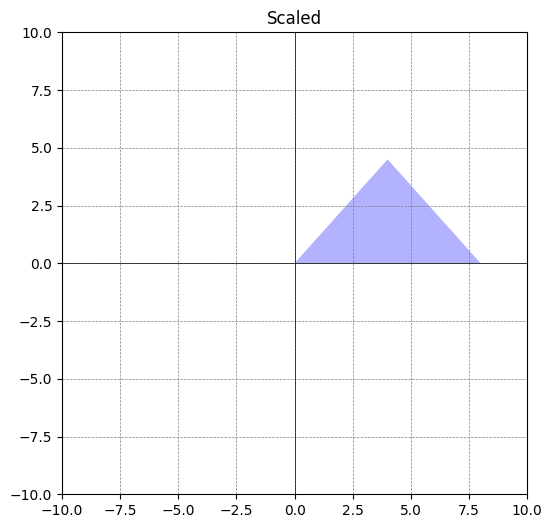

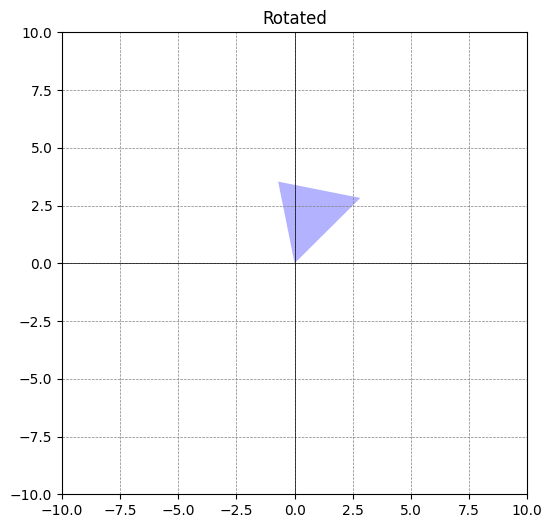

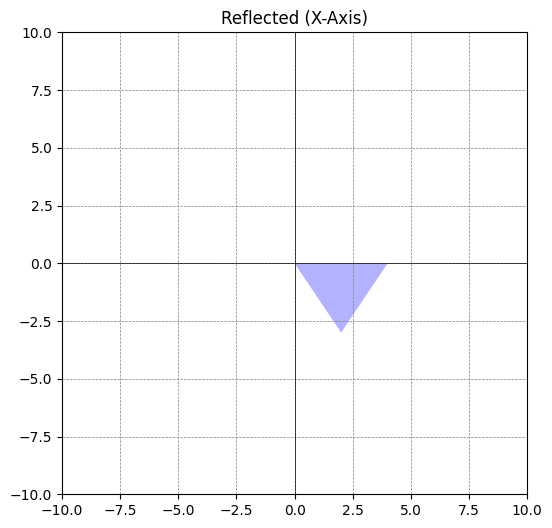

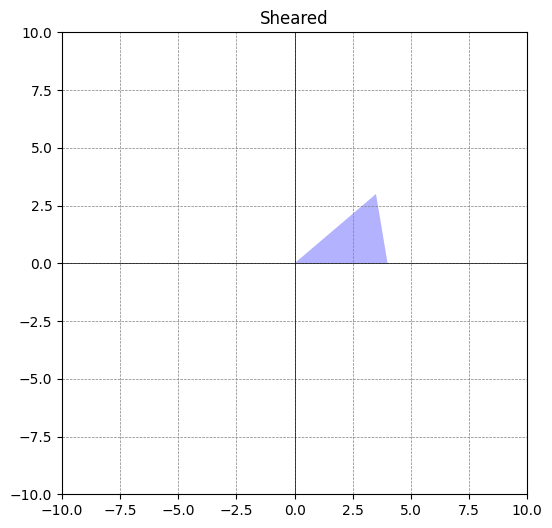

In [ ]:
#TASK1
import numpy as np
import matplotlib.pyplot as plt

# Plotting
def plot_object(points, title, color='b'):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.fill(points[:, 0], points[:, 1], color, alpha=0.3)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

# Translation
def translate(points, tx, ty):
    T = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (T @ points.T).T[:, :2]

# Scaling
def scale(points, sx, sy):
    S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (S @ points.T).T[:, :2]

# Rotation
def rotate(points, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])
    points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (R @ points.T).T[:, :2]

# Reflection
def reflect(points, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (R @ points.T).T[:, :2]

# Shearing
def shear(points, shx, shy):
    SH = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    points = np.hstack((points, np.ones((points.shape[0], 1))))
    return (SH @ points.T).T[:, :2]

# Original object (triangle)
triangle = np.array([[0, 0], [4, 0], [2, 3]])

# Apply transformations
translated = translate(triangle, 3, 2)
scaled = scale(triangle, 2, 1.5)
rotated = rotate(triangle, 45)
reflected_x = reflect(triangle, 'x')
sheared = shear(triangle, 0.5, 0)

# Plot results
plot_object(triangle, "Original Object")
plot_object(translated, "Translated")
plot_object(scaled, "Scaled")
plot_object(rotated, "Rotated")
plot_object(reflected_x, "Reflected (X-Axis)")
plot_object(sheared, "Sheared")


In [ ]:
#TASK 2

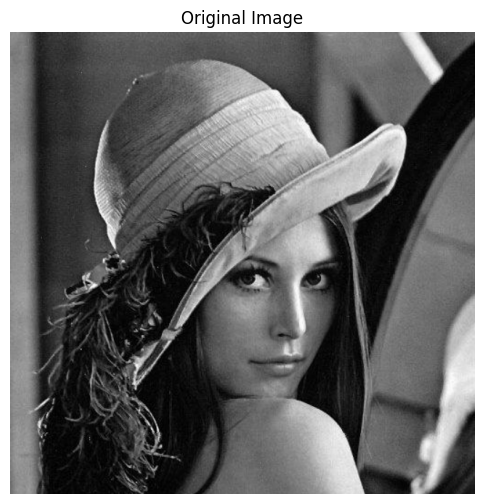

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/lab1compvision.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
def show_image(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the original image
show_image(image, "Original Image")


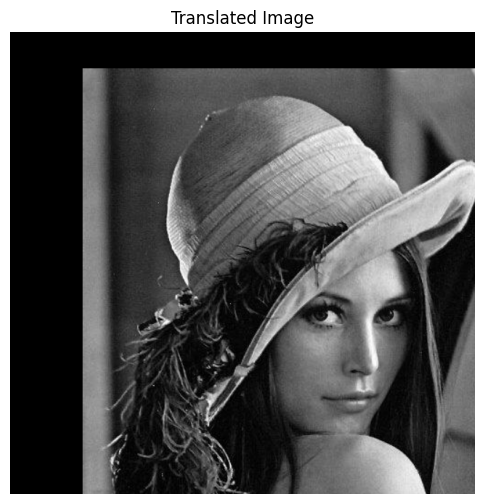

In [ ]:
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, matrix, (cols, rows))

translated_img = translate_image(image, 100, 50)
show_image(translated_img, "Translated Image")


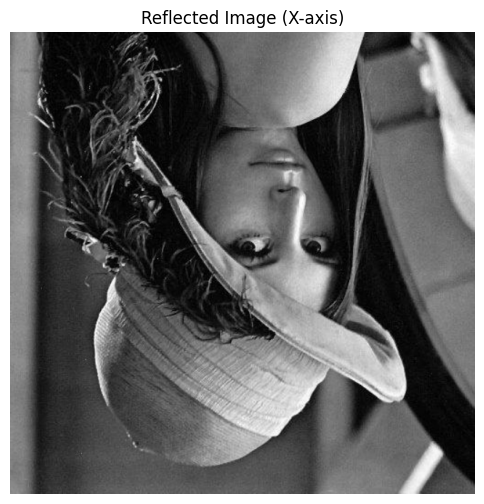

In [ ]:
def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)

reflected_img = reflect_image(image, 'x')
show_image(reflected_img, "Reflected Image (X-axis)")


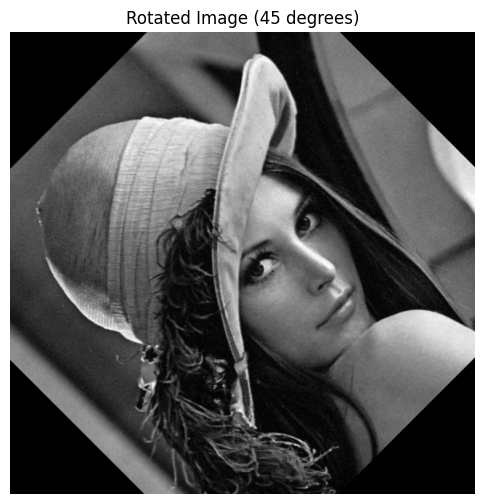

In [ ]:
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, matrix, (cols, rows))

rotated_img = rotate_image(image, 45)
show_image(rotated_img, "Rotated Image (45 degrees)")


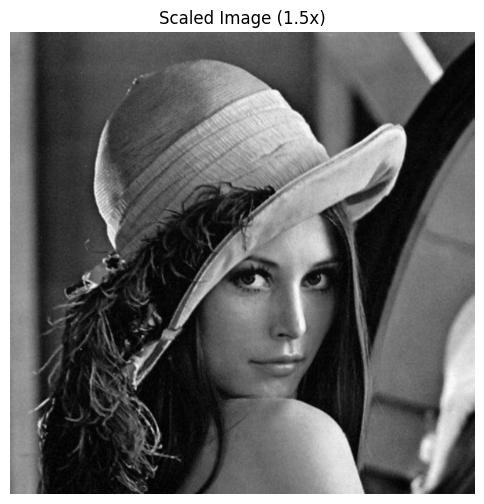

In [ ]:
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled_img = scale_image(image, 1.5, 1.5)
show_image(scaled_img, "Scaled Image (1.5x)")


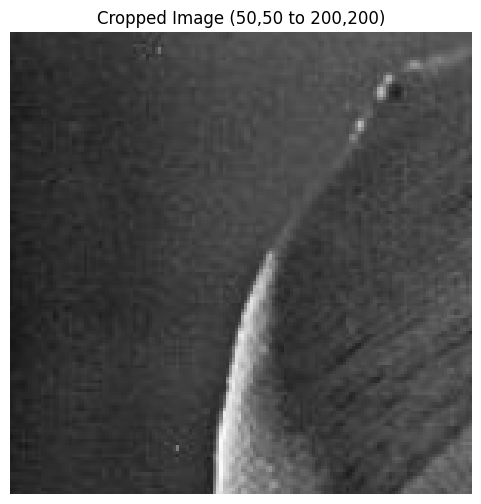

In [ ]:
def crop_image(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

cropped_img = crop_image(image, 50, 50, 200, 200)
show_image(cropped_img, "Cropped Image (50,50 to 200,200)")


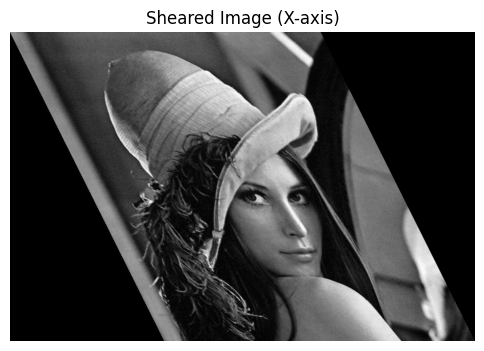

In [ ]:
def shear_x(img, shx):
    rows, cols = img.shape[:2]
    matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(img, matrix, (cols + int(rows * abs(shx)), rows))

sheared_x_img = shear_x(image, 0.5)
show_image(sheared_x_img, "Sheared Image (X-axis)")


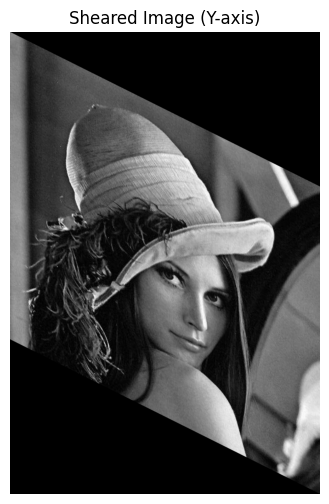

In [ ]:
def shear_y(img, shy):
    rows, cols = img.shape[:2]
    matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, matrix, (cols, rows + int(cols * abs(shy))))

sheared_y_img = shear_y(image, 0.5)
show_image(sheared_y_img, "Sheared Image (Y-axis)")
